# Data and Sentiment Analyses on Seattle Airbnb Open Data

Author: Heng Li
* LinkedIn: www.linkedin.com/in/hengli700
* Medium: https://medium.com/@hengli700
* Medium post:
<br>
<br>

## Objective

Airbnb is one of many visitors' prefered choices to book stays visiting places from busy cities to national parks. <br> 

In this Seattle Airbnb data set, data anlyses and visualizations were used to answer the following questions: <br>

1. What are the busiest times of the year to visit Seattle? By how much do prices spike? <br><br>
   *This helps Seattle area business owners and Airbnb to get ready for the hot season (**business decision**), as well as helps visitor in planning travel accordingly to avoid peak seasons (**personal choice**).* <br><br>
   
2. Is there a general upward trend of both new Airbnb listings and total Airbnb visitors to Seattle? <br><br>
   *Trends in Airbnb listing and visitor growth from 2009 to 2016 were distilled from listings and reviews datasets.* <br><br>
   
3. Can you describe the vibe of each Seattle neighborhood using listing descriptions?<br><br>
   *Sentiment analysis via [textblob](https://textblob.readthedocs.io/en/dev/) and [NLTK](https://www.nltk.org/) was performed to describe the vibe of major Seattle neighborhoods. **This helps the potential visitors to select the neighborhood to stay which match their personal taste**.*<br><br>
   
4. How does visitors feel about the listings in each Seattle neighborhood using review comments?<br><br>
    *Sentiment analysis was used on visitor review comments to extract what are the pros and cons on listed properties in each neighborhoods. **This helps the rental property owners to identify room for improvement and enhance visitors' staying experience**.*<br><br>
 

## Import necessary libraries and datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from textblob import Word
from collections import Counter
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

%matplotlib inline

df_calendar = pd.read_csv('calendar.csv')
df_listings = pd.read_csv('listings.csv')
df_reviews = pd.read_csv('reviews.csv')

[nltk_data] Downloading package punkt to /Users/heng/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/heng/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/heng/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Data exploration

In [2]:
print(f"calendar dataset has {df_calendar.shape[0]} rows and {df_calendar.shape[1]} columns")
print(f"listings dataset has {df_listings.shape[0]} rows and {df_listings.shape[1]} columns")
print(f"reviews dataset has {df_reviews.shape[0]} rows and {df_reviews.shape[1]} columns")

calendar dataset has 1393570 rows and 4 columns
listings dataset has 3818 rows and 92 columns
reviews dataset has 84849 rows and 6 columns


In [3]:
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [5]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [6]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [7]:
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [8]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


<br><br>

### 1. What are the busiest times of the year to visit Seattle? By how much do prices spike?


To answer the first question, it is most ideal to have the booking information of the listings in Seattle area. However, this information is not provided as a dataset. Instead, reviews dataset can be used to inform this information, due to the fact that, after a stay, visitor tends to leave a review. Each row in the df_reviews can be used as a count. By summing up the counts according to year and month, the busiest times of the year to visit Seattle can be found, i.e., hot season vs cold season. <br><br>


For the second question, with the information on the busiest months (hot season) and normal months (cold season), the average prices for each individual listing during hot and cold seasons are calculated using calendar dataset. Price info included in calendar dataset is only for 2016. Therefore the price spike is for the year 2016. To obtain this information, first, the price increase for each listing from cold to hot season is calculated. The final averaged price increase among all listings indicates by how much prices spike from cold to hot season in Seattle area Airbnb rental properties.

In [9]:
df_visitors = df_reviews.copy()
df_visitors['date'] = pd.to_datetime(df_visitors['date'])

In [10]:
df_visitors['month'] = pd.DatetimeIndex(df_visitors['date']).month
# df_visitors['month'] = df_visitors['date'].dt.strftime('%b')
df_visitors['year'] = pd.DatetimeIndex(df_visitors['date']).year

In [11]:
df_visitors.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,month,year
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,7,2015
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,7,2015
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb...",7,2015
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...,8,2015
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...,8,2015


In [12]:
df_visitors = df_visitors.groupby(['year', 'month']).size().reset_index(name='count')
df_visitors.head()

,year,month,count
0,2009,6,2
1,2009,7,1
2,2009,8,1
3,2009,9,2
4,2009,10,6


In [13]:
df_visitors = df_visitors.sort_values(['year', 'month'], ascending = [1, 1])
df_visitors

,year,month,count
0,2009,6,2
1,2009,7,1
2,2009,8,1
3,2009,9,2
4,2009,10,6
...,...,...,...
74,2015,9,6985
75,2015,10,5536
76,2015,11,3998
77,2015,12,3351


In [14]:
# find the number of guests per year
df_visitors.groupby(['year']).sum()['count']

year
2009       17
2010      254
2011     1169
2012     3251
2013     7077
2014    20365
2015    52493
2016      223
Name: count, dtype: int64

In [15]:
# percent of visitor increase compared with previous year
df_visitors.groupby(['year']).sum()['count'].pct_change()

year
2009          NaN
2010    13.941176
2011     3.602362
2012     1.781009
2013     1.176869
2014     1.877632
2015     1.577609
2016    -0.995752
Name: count, dtype: float64

#### Visualize number of visitors per month for the year 2013, 2014, and 2015

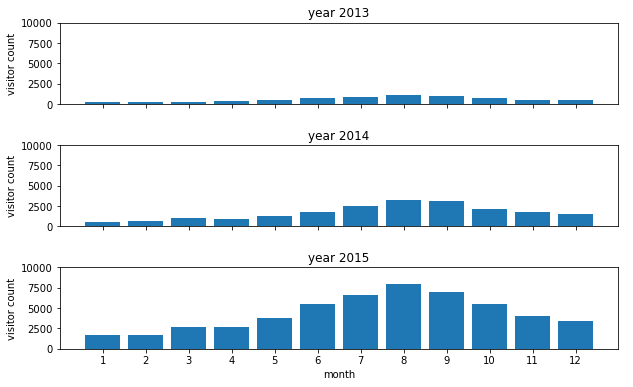

In [16]:
fig, axs = plt.subplots(3, 1, figsize=(10, 6), sharex=True, sharey=True)
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0.5)

# Plot each graph, and manually set the y tick values
axs[0].bar(df_visitors[df_visitors['year']==2013]['month'], df_visitors[df_visitors['year']==2013]['count'], color='tab:blue')
axs[0].set_title('year 2013')
axs[0].set_ylabel('visitor count')

axs[1].bar(df_visitors[df_visitors['year']==2014]['month'], df_visitors[df_visitors['year']==2014]['count'], color='tab:blue')
axs[1].set_title('year 2014')
axs[1].set_ylabel('visitor count')

axs[2].bar(df_visitors[df_visitors['year']==2015]['month'], df_visitors[df_visitors['year']==2015]['count'], color='tab:blue')
axs[2].set_title('year 2015')
axs[2].set_ylabel('visitor count')


axs[2].set_ylim(0,10000)
axs[2].set_xticks(range(1,13))



fig.add_subplot(111,  frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)

plt.xlabel('month')

plt.show()

In [17]:
df_visitors['pct_change']=df_visitors['count'].pct_change()
df_visitors.head()

,year,month,count,pct_change
0,2009,6,2,NaN
1,2009,7,1,-0.5
2,2009,8,1,0.0
3,2009,9,2,1.0
4,2009,10,6,2.0


#### Visualize incremental changes in number of visitors per month from a month prior for the year 2013, 2014, and 2015

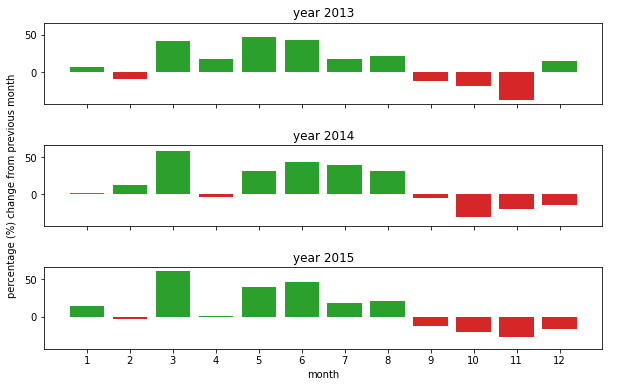

In [18]:
fig, axs = plt.subplots(3, 1, figsize=(10, 6), sharex=True, sharey=True)
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0.5)

# Plot each graph, and manually set the y tick values
axs[0].bar(df_visitors[df_visitors['year']==2013]['month'], df_visitors[df_visitors['year']==2013]['pct_change']*100,
           color=(df_visitors[df_visitors['year']==2013]['pct_change']>0).map({True:'tab:green', False:'tab:red'}))
axs[0].set_title('year 2013')


axs[1].bar(df_visitors[df_visitors['year']==2014]['month'], df_visitors[df_visitors['year']==2014]['pct_change']*100,
           color=(df_visitors[df_visitors['year']==2014]['pct_change']>0).map({True:'tab:green', False:'tab:red'}))
axs[1].set_title('year 2014')

axs[2].bar(df_visitors[df_visitors['year']==2015]['month'], df_visitors[df_visitors['year']==2015]['pct_change']*100, 
          color=(df_visitors[df_visitors['year']==2015]['pct_change']>0).map({True:'tab:green', False:'tab:red'}))
axs[2].set_title('year 2015')


# axs[2].set_ylim(0,10000)
axs[2].set_xticks(range(1,13))

# add common x and y labels

fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)

plt.xlabel("month")
plt.ylabel("percentage (%) change from previous month")

plt.show()

In [19]:
df_visitors_average = df_visitors.groupby(['year']).mean()['count'].reset_index().rename(columns={'count':'average count per year'})

In [20]:
df_visitors_average

,year,average count per year
0,2009,2.833333
1,2010,21.166667
2,2011,97.416667
3,2012,270.916667
4,2013,589.750000
5,2014,1697.083333
6,2015,4374.416667
7,2016,223.000000


In [21]:
df_visitors = pd.merge(df_visitors, df_visitors_average, on='year')

In [22]:
df_visitors.head()

,year,month,count,pct_change,average count per year
0,2009,6,2,NaN,2.833333
1,2009,7,1,-0.5,2.833333
2,2009,8,1,0.0,2.833333
3,2009,9,2,1.0,2.833333
4,2009,10,6,2.0,2.833333


In [23]:
df_visitors['monthly fluctuation'] = (df_visitors['count'] - df_visitors['average count per year'])/ df_visitors['average count per year']
df_visitors.head()

,year,month,count,pct_change,average count per year,monthly fluctuation
0,2009,6,2,NaN,2.833333,-0.294118
1,2009,7,1,-0.5,2.833333,-0.647059
2,2009,8,1,0.0,2.833333,-0.647059
3,2009,9,2,1.0,2.833333,-0.294118
4,2009,10,6,2.0,2.833333,1.117647


#### Visualize percentage of fluctuation around annual average number of visitors per month for the year 2013, 2014, and 2015

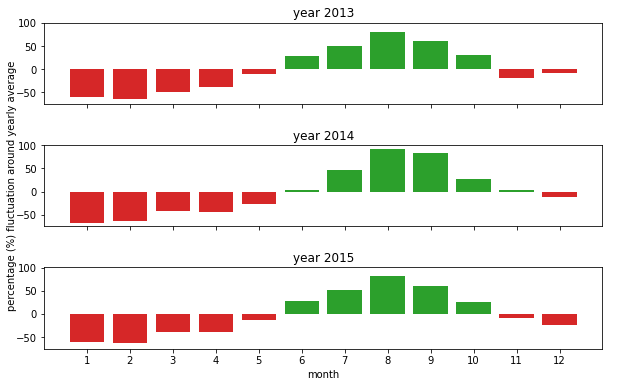

In [24]:
fig, axs = plt.subplots(3, 1, figsize=(10, 6), sharex=True, sharey=True)
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0.5)

# Plot each graph, and manually set the y tick values
axs[0].bar(df_visitors[df_visitors['year']==2013]['month'], df_visitors[df_visitors['year']==2013]['monthly fluctuation']*100,
           color=(df_visitors[df_visitors['year']==2013]['monthly fluctuation']>0).map({True:'tab:green', False:'tab:red'}))
axs[0].set_title('year 2013')


axs[1].bar(df_visitors[df_visitors['year']==2014]['month'], df_visitors[df_visitors['year']==2014]['monthly fluctuation']*100,
           color=(df_visitors[df_visitors['year']==2014]['monthly fluctuation']>0).map({True:'tab:green', False:'tab:red'}))
axs[1].set_title('year 2014')

axs[2].bar(df_visitors[df_visitors['year']==2015]['month'], df_visitors[df_visitors['year']==2015]['monthly fluctuation']*100, 
          color=(df_visitors[df_visitors['year']==2015]['monthly fluctuation']>0).map({True:'tab:green', False:'tab:red'}))
axs[2].set_title('year 2015')


# axs[2].set_ylim(0,10000)
axs[2].set_xticks(range(1,13))

# add common x and y labels

fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)

plt.xlabel("month")
plt.ylabel("percentage (%) fluctuation around yearly average")

plt.show()

#### The businest time to visit Seattle is :

* Hot season is from June all the way through October<br>

* Cold season is from November through comming May <br>

#### By how much the price spike from cold to hot season?

In [25]:
# use df_calendar
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [26]:
df_prices = df_calendar.dropna(axis=0, how='any').drop(columns=['available']).reset_index(drop=True)
df_prices.head()

,listing_id,date,price
0,241032,2016-01-04,$85.00
1,241032,2016-01-05,$85.00
2,241032,2016-01-13,$85.00
3,241032,2016-01-14,$85.00
4,241032,2016-01-18,$85.00


In [27]:
df_prices['date'] = pd.to_datetime(df_prices['date'])
df_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934542 entries, 0 to 934541
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   listing_id  934542 non-null  int64         
 1   date        934542 non-null  datetime64[ns]
 2   price       934542 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 21.4+ MB


In [28]:
df_prices['price'] = df_prices['price'].replace('[\$,]', '', regex=True).astype(float)

In [29]:
df_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934542 entries, 0 to 934541
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   listing_id  934542 non-null  int64         
 1   date        934542 non-null  datetime64[ns]
 2   price       934542 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 21.4 MB


Calculate the average monthly price for each listing

In [30]:
df_prices['month'] = pd.DatetimeIndex(df_prices['date']).month
# df_visitors['month'] = df_visitors['date'].dt.strftime('%b')
df_prices['year'] = pd.DatetimeIndex(df_prices['date']).year

In [31]:
df_prices = df_prices.drop(columns=['date'])

In [32]:
df_prices = df_prices.groupby(['listing_id', 'year', 'month']).mean()['price'].reset_index(name='average price by month')
df_prices.head()

,listing_id,year,month,average price by month
0,3335,2016,2,120.0
1,3335,2016,3,120.0
2,3335,2016,4,120.0
3,3335,2016,5,120.0
4,3335,2016,6,120.0


Use price data from 2016 only

In [33]:
df_prices = df_prices[df_prices['year']==2016].reset_index(drop=True)

In [34]:
df_prices_cold = df_prices[df_prices['month'].isin([11,12,1,2,3,4,5])].groupby(['listing_id','year']).mean()['average price by month'].reset_index(name='cold season average price')

In [35]:
df_prices_cold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3682 entries, 0 to 3681
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   listing_id                 3682 non-null   int64  
 1   year                       3682 non-null   int64  
 2   cold season average price  3682 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 86.4 KB


In [36]:
df_prices_hot = df_prices[df_prices['month'].isin([6, 7, 8, 9 ,10])].groupby(['listing_id','year']).mean()['average price by month'].reset_index(name='hot season average price')

In [37]:
df_prices_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3063 entries, 0 to 3062
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   listing_id                3063 non-null   int64  
 1   year                      3063 non-null   int64  
 2   hot season average price  3063 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 71.9 KB


In [38]:
# since the number of rows are different, use inner join to rows with shared common listing_id
df_prices_hotncold=pd.merge(df_prices_cold, df_prices_hot, how="inner", on=["listing_id"])

In [39]:
df_prices_hotncold.head()

,listing_id,year_x,cold season average price,year_y,hot season average price
0,3335,2016,120.000000,2016,120.000000
1,4291,2016,82.000000,2016,82.000000
2,5682,2016,51.777797,2016,56.342796
3,6606,2016,92.857551,2016,92.875269
4,9419,2016,80.067588,2016,92.875269


In [40]:
df_prices_hotncold['price spike'] = (df_prices_hotncold['hot season average price'] - df_prices_hotncold['cold season average price'])/df_prices_hotncold['cold season average price']

In [41]:
df_prices_hotncold.head()

,listing_id,year_x,cold season average price,year_y,hot season average price,price spike
0,3335,2016,120.000000,2016,120.000000,0.000000
1,4291,2016,82.000000,2016,82.000000,0.000000
2,5682,2016,51.777797,2016,56.342796,0.088165
3,6606,2016,92.857551,2016,92.875269,0.000191
4,9419,2016,80.067588,2016,92.875269,0.159961


#### Average price spike across all listing in 2016 in Seattle area from cold to hot season

In [42]:
print(f'Average price spike across all listing in 2016 in Seattle area from cold to hot season is: {df_prices_hotncold["price spike"].mean()*100:5.2f}%')

Average price spike across all listing in 2016 in Seattle area from cold to hot season is:  7.94%


<br><br>

### 2. Is there a general upward trend of both new Airbnb listings and total Airbnb visitors to Seattle?

To answer this question, we need to find the cumulated new Airbnb listings over the years, and total Airbnb visitors to Seattle during the same time period. <br>

Even though listings dataset is provided, the listing information is not comprehensive, i.e., it only included information from the year 2016 and January 2017. This is not enough for generating the trends and find the correlations between new Airbnb listings and total Airbnb visitors. We need more data that can shed light on how these two are correlated or if there is any correlation at all.<br>

For this reason, the reviews dataset was used to extract information about new Airbnb listings and total Airbnb visitors. The trends of cumulative new Airbnb listings and total Airbnb visitors to Seattle from 2009 and 2016 were analyzed and visualized.

In [43]:
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [44]:
df_new_listings = df_reviews.groupby(['listing_id']).first().reset_index()[['listing_id', 'date']]
df_new_listings.head()

,listing_id,date
0,4291,2013-07-01
1,5682,2010-03-21
2,6606,2009-07-17
3,7369,2009-06-07
4,9419,2010-07-30


In [45]:
df_new_listings['date'] = pd.to_datetime(df_new_listings['date'])
df_new_listings['month'] = pd.DatetimeIndex(df_new_listings['date']).month
df_new_listings['year'] = pd.DatetimeIndex(df_new_listings['date']).year
df_new_listings.head()

,listing_id,date,month,year
0,4291,2013-07-01,7,2013
1,5682,2010-03-21,3,2010
2,6606,2009-07-17,7,2009
3,7369,2009-06-07,6,2009
4,9419,2010-07-30,7,2010


In [46]:
df_new_listings = df_new_listings.groupby(['year','month']).count()['listing_id'].reset_index(name='monthly new listings')

In [47]:
df_new_listings['date'] = pd.to_datetime(df_new_listings['month'].astype(str) +'/'+ df_new_listings['year'].astype(str), format='%m/%Y')

In [48]:
df_new_listings = df_new_listings.sort_values(by=['date'])
df_new_listings.head()

,year,month,monthly new listings,date
0,2009,6,1,2009-06-01
1,2009,7,1,2009-07-01
2,2009,8,1,2009-08-01
3,2009,10,1,2009-10-01
4,2010,1,1,2010-01-01


In [49]:
df_new_listings['cumulative new listings']= df_new_listings['monthly new listings'].cumsum()
df_new_listings.head()

,year,month,monthly new listings,date,cumulative new listings
0,2009,6,1,2009-06-01,1
1,2009,7,1,2009-07-01,2
2,2009,8,1,2009-08-01,3
3,2009,10,1,2009-10-01,4
4,2010,1,1,2010-01-01,5


In [50]:
df_visitors['date'] = pd.to_datetime(df_visitors['month'].astype(str) +'/'+ df_visitors['year'].astype(str), format='%m/%Y')
df_visitors['total visitors']= df_visitors['count'].cumsum()
df_visitors.head()

,year,month,count,pct_change,average count per year,monthly fluctuation,date,total visitors
0,2009,6,2,NaN,2.833333,-0.294118,2009-06-01,2
1,2009,7,1,-0.5,2.833333,-0.647059,2009-07-01,3
2,2009,8,1,0.0,2.833333,-0.647059,2009-08-01,4
3,2009,9,2,1.0,2.833333,-0.294118,2009-09-01,6
4,2009,10,6,2.0,2.833333,1.117647,2009-10-01,12


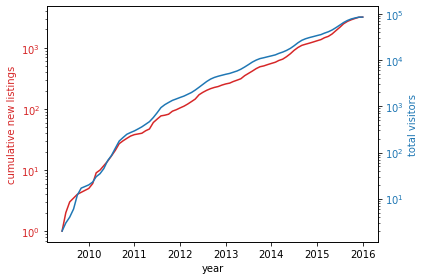

In [51]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('year')
ax1.set_ylabel('cumulative new listings', color=color)
ax1.set_yscale("log")
ax1.plot(df_new_listings['date'], df_new_listings['cumulative new listings'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('total visitors', color=color)  # we already handled the x-label with ax1
ax2.set_yscale("log")
ax2.plot(df_visitors['date'], df_visitors['total visitors'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

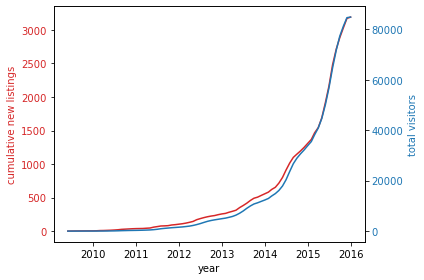

In [52]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('year')
ax1.set_ylabel('cumulative new listings', color=color)
ax1.plot(df_new_listings['date'], df_new_listings['cumulative new listings'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('total visitors', color=color)  # we already handled the x-label with ax1
ax2.plot(df_visitors['date'], df_visitors['total visitors'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

#### General trends of both new Airbnb listings and total Airbnb visitors to Seattle

Based on above visualizations, it was found that both new Airbnb listings and total Airbnb visitors to Seattle show upward trends. In particular, growths in both new listings and visitors show drastic increase since 2013, and they are in sync with one another, indicating the rental market is constantly meeting new demands generated by Airbnb platform.

<br><br>

### 3. Can you describe the vibe of each Seattle neighborhood using listing descriptions?

To prepare data for answering this question, the neighbourhood_group_cleansed and neighborhood_overview columns will be used. The neighborhood_overview is for sub neighborhoods which belongs to individual neighborhood group. Therefore, all sub neighborhood overviews are combined together under the same neighborhood group.<br>

To answer this question, I used the adjective words in the overview to represent the vibe or general feeling about a neighborhood. For this reason, a customized ```analyze_sentiment()``` method is used to parse in data and output a dataframe with sentiment for each adjective word appearing in the overview text for that neighborhood group. The frequence of each word is counted, and only top 5 positive (if any) and top 5 negative (if any) adjective words will be highlighted and used in decribing the vibe.

In [53]:
def analyze_sentiment(df):
    df_result = pd.DataFrame(columns=['neighbourhood_group', 'adjective', 'count', 'polarity', 'sentiment'])
    
    for index in df.index:
        comments = TextBlob(df.iloc[index,1])
        neighbourhood_group = df.iloc[index,0]
        print(f'analyzing neighbourhood group {neighbourhood_group}...')
        adj_arr = []
        for tag in comments.tags:
            if tag[1] in ['JJ', 'JJR', 'JJS']:
                adj_arr.append(Word(tag[0].lower()).lemmatize('JJ'))
        adj_count_dict = Counter(adj_arr)
        df_adjs = pd.DataFrame.from_dict(adj_count_dict, orient='index').reset_index()
        df_adjs = df_adjs.rename(columns={'index':'adjective', 0:'count'})
        df_adjs["polarity"]=0
        df_adjs['neighbourhood_group'] = neighbourhood_group
        for index in df_adjs.index:
            df_adjs.loc[index,"polarity"] = TextBlob(df_adjs.loc[index,"adjective"]).polarity
        df_adjs['sentiment'] = ['positive' if x >0.2 else ('negative' if x<-0.2 else 'neutral')  for x in df_adjs['polarity']]
        
        df_result = pd.concat([df_result,df_adjs])
    print('**completed analyses, returned result!')
    return df_result

In [54]:
# use df_listings to analyze the vibes for the neighbourhood
df_vibes=df_listings[['neighbourhood_group_cleansed', 'neighborhood_overview']]

In [55]:
df_vibes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   neighbourhood_group_cleansed  3818 non-null   object
 1   neighborhood_overview         2786 non-null   object
dtypes: object(2)
memory usage: 59.8+ KB


In [56]:
df_vibes = df_vibes.dropna()
df_vibes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2786 entries, 1 to 3816
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   neighbourhood_group_cleansed  2786 non-null   object
 1   neighborhood_overview         2786 non-null   object
dtypes: object(2)
memory usage: 65.3+ KB


In [57]:
df_vibes=df_vibes.groupby(['neighbourhood_group_cleansed']).agg({'neighborhood_overview': ' '.join}).reset_index()

In [58]:
df_vibes['neighborhood_overview'][0]

'Walk score: 90. Nuff said. Ballard is a quaint, Norwegian neighborhood. Plenty of unique restaurants, shops, cafes, local and major grocery stores.  Just a walk, bike ride or bus stop away from the Ballard Locks, Gasworks Park, Golden Gardens Beach and Downtown Seattle.   Ballard is a hip fun neighborhood with a great Farmers Market year round on Sundays. There are tons of restaurants, cafes, bars and shops. You can walk to most things from the Plum House. Super Hip, Tons to do, Great Food, Great Bars, Great Sunday Market, Great Shops. Things to do in Ballard Alone: Ballard Locks Golden Gardens Park Burke Gilman Trail, and dont forget to EAT! Dinner:  Walrus & the Carpenter, Chippy\'s, Staple & Fancy, Ballard Pizza Co Bars:  Kings, Percy\'s, and The Noble Fir are a few of my fav\'s Dessert:  Hot Cakes, Cupcake Royale Grocery:  The Ballard Market, locally owned, and the Sunday Market - so fun! Brunch:  The Fat Hen, Skillet, and The Dish are a few of my fav\'s Coffee:  Bauhaus, Anchored

In [59]:
df_vibes_analyzed = analyze_sentiment(df_vibes)

analyzing neighbourhood group Ballard...
analyzing neighbourhood group Beacon Hill...
analyzing neighbourhood group Capitol Hill...
analyzing neighbourhood group Cascade...
analyzing neighbourhood group Central Area...
analyzing neighbourhood group Delridge...
analyzing neighbourhood group Downtown...
analyzing neighbourhood group Interbay...
analyzing neighbourhood group Lake City...
analyzing neighbourhood group Magnolia...
analyzing neighbourhood group Northgate...
analyzing neighbourhood group Other neighborhoods...
analyzing neighbourhood group Queen Anne...
analyzing neighbourhood group Rainier Valley...
analyzing neighbourhood group Seward Park...
analyzing neighbourhood group University District...
analyzing neighbourhood group West Seattle...
**completed analyses, returned result!


In [60]:
neighbourhood_groups = pd.unique(df_vibes_analyzed['neighbourhood_group']).tolist()
neighbourhood_groups.remove('Other neighborhoods')
print(neighbourhood_groups)
print(len(neighbourhood_groups))

['Ballard', 'Beacon Hill', 'Capitol Hill', 'Cascade', 'Central Area', 'Delridge', 'Downtown', 'Interbay', 'Lake City', 'Magnolia', 'Northgate', 'Queen Anne', 'Rainier Valley', 'Seward Park', 'University District', 'West Seattle']
16


/opt/anaconda3/envs/dsnd/lib/python3.6/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/anaconda3/envs/dsnd/lib/python3.6/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


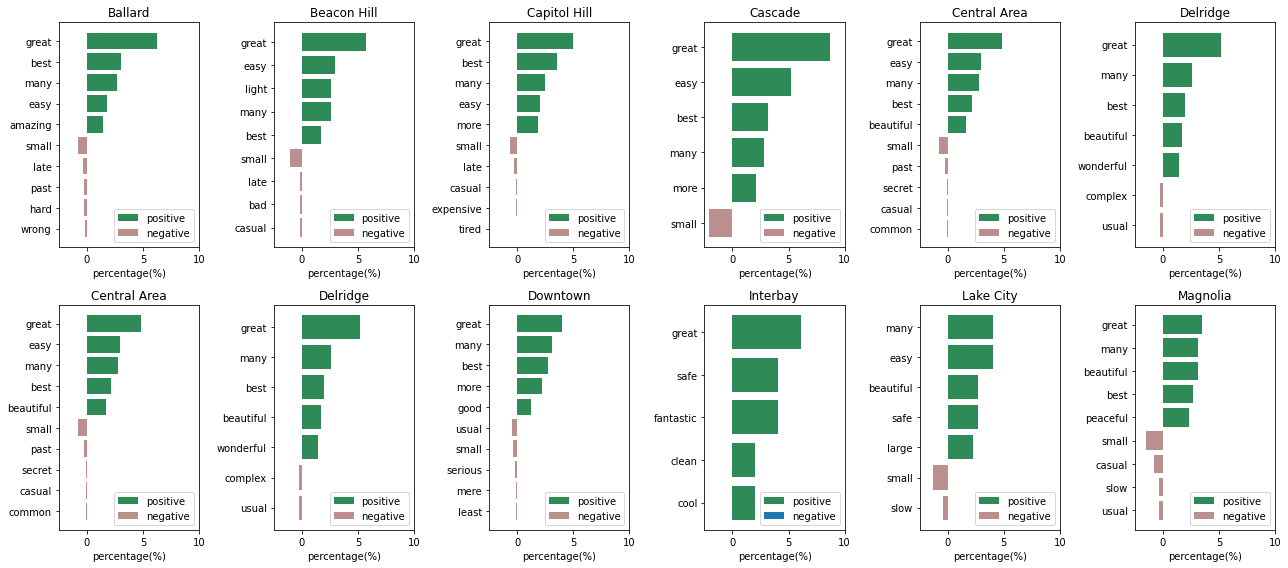

In [61]:
fig, axs = plt.subplots(2,6, figsize=(18,8))

for i in range(2):
    for j in range(6):
        neighbourhood_group=neighbourhood_groups[i*4+j]
        temp_df = df_vibes_analyzed[df_vibes_analyzed['neighbourhood_group']==neighbourhood_group]
        temp_df.loc[:, 'pct'] = temp_df.loc[:, 'count'] / np.sum(temp_df.loc[:, 'count'])
        df_neg_=temp_df[temp_df['sentiment']=='negative'].sort_values(by=['pct'], ascending=[0])[:5]
        df_pos_=temp_df[temp_df['sentiment']=='positive'].sort_values(by=['pct'], ascending=[0])[:5]
        axs[i,j].barh(df_pos_['adjective'], df_pos_['pct']*100, align='center', color='seagreen', label='positive')
        axs[i,j].barh(df_neg_['adjective'], df_neg_['pct']*-100, align='center', color='rosybrown', label='negative')
        axs[i,j].invert_yaxis()  # labels read top-to-bottom
        axs[i,j].set_xlabel('percentage(%)')
        axs[i,j].set_xlim([-2.5,10])
        axs[i,j].set_title(neighbourhood_group)
        axs[i,j].legend()
plt.tight_layout()
plt.show()

#### The vibe of each Seattle neighborhood using listing dataset
Using adjective words is one of many ways to decribe a vibe of a place, such as a beautiful/peaceful/wonderful town. Based on the top five positive adjectives, most neighborhood groups shared similar vibes such as great, many, and easy. Some of the neighborhood groups also have special vibes, such as amazing for Ballard, safe for Interbay and Lake city, and peaceful for Magnolia.

<br><br>

### 4. How does visitors feel about the listings in each Seattle neighborhood using review comments?

Using the comments from reviews dataset, we could get information from visitors regarding their experience on their stay on listed properities in each Seattle neighborhood group.

In [62]:
df_feelings=pd.merge(df_listings, df_reviews, left_on="id", right_on='listing_id', how='inner')[['neighbourhood_group_cleansed', 'comments']]

In [63]:
df_feelings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84849 entries, 0 to 84848
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   neighbourhood_group_cleansed  84849 non-null  object
 1   comments                      84831 non-null  object
dtypes: object(2)
memory usage: 1.9+ MB


In [64]:
df_feelings = df_feelings.dropna()
df_feelings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84831 entries, 0 to 84848
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   neighbourhood_group_cleansed  84831 non-null  object
 1   comments                      84831 non-null  object
dtypes: object(2)
memory usage: 1.9+ MB


In [65]:
df_feelings=df_feelings.groupby(['neighbourhood_group_cleansed']).agg({'comments': ' '.join}).reset_index()

In [66]:
df_feelings['comments'][0]

'The place was very large, neighborhood was quiet and convenient. Clean and wonderful place. Dina was extremely helpful when we needed help. \r\n\r\nAwesome place. Went for TI5. Would definitely stay there again. She gave us directions and was communications in answering us was too notch. Dina was an incredible host! She goes above and beyond for her guests and has a wickedly quick response rate for questions. \r\n\r\nThe house was so charming and spread out with more than enough room for 6 people. There is a really nice energy in the house as well! The neighborhood is great and very easy to get around. I definitely recommend it.  It was simple to get in and settle down in this cute townhouse. Dina was communicative and accommodating! Dina was great. After a last minute cancelation of another airbnb, she was able to accommodate us in her home on short notice. The place is great, along with the location. Coffee shops, the locks, restaurants all within walking distance. She was also very

In [67]:
df_feelings_analyzed = analyze_sentiment(df_feelings)

analyzing neighbourhood group Ballard...
analyzing neighbourhood group Beacon Hill...
analyzing neighbourhood group Capitol Hill...
analyzing neighbourhood group Cascade...
analyzing neighbourhood group Central Area...
analyzing neighbourhood group Delridge...
analyzing neighbourhood group Downtown...
analyzing neighbourhood group Interbay...
analyzing neighbourhood group Lake City...
analyzing neighbourhood group Magnolia...
analyzing neighbourhood group Northgate...
analyzing neighbourhood group Other neighborhoods...
analyzing neighbourhood group Queen Anne...
analyzing neighbourhood group Rainier Valley...
analyzing neighbourhood group Seward Park...
analyzing neighbourhood group University District...
analyzing neighbourhood group West Seattle...
**completed analyses, returned result!


/opt/anaconda3/envs/dsnd/lib/python3.6/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/anaconda3/envs/dsnd/lib/python3.6/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


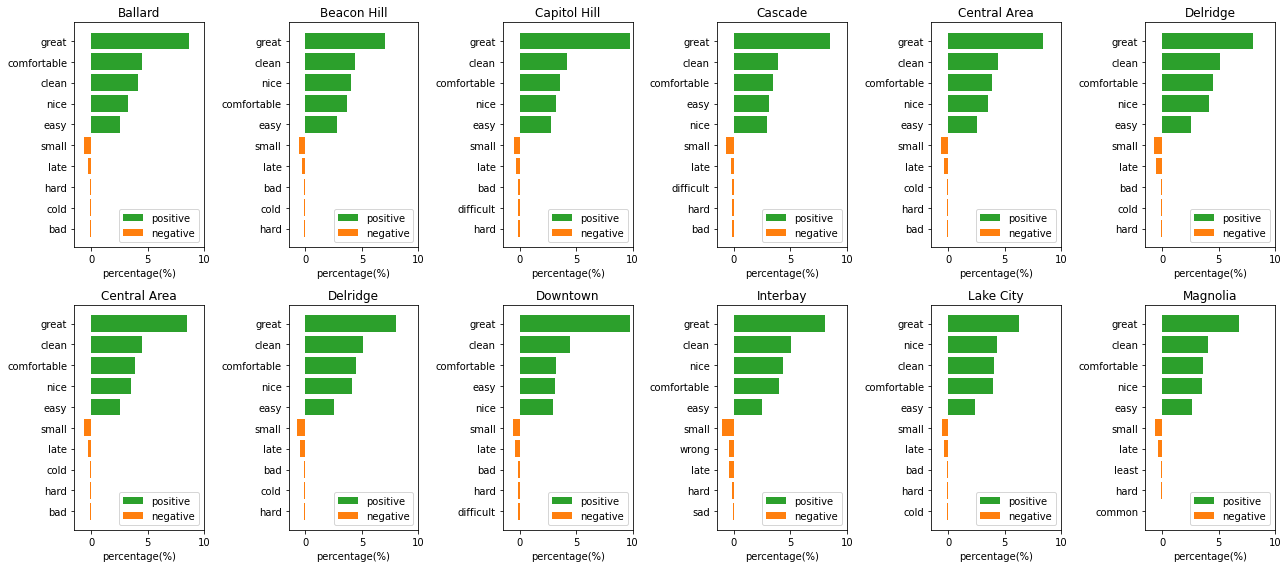

In [68]:
fig, axs = plt.subplots(2,6, figsize=(18,8))

for i in range(2):
    for j in range(6):
        neighbourhood_group=neighbourhood_groups[i*4+j]
        temp_df = df_feelings_analyzed[df_feelings_analyzed['neighbourhood_group']==neighbourhood_group]
        temp_df.loc[:, 'pct'] = temp_df.loc[:, 'count'] / np.sum(temp_df.loc[:, 'count'])
        df_neg_=temp_df[temp_df['sentiment']=='negative'].sort_values(by=['pct'], ascending=[0])[:5]
        df_pos_=temp_df[temp_df['sentiment']=='positive'].sort_values(by=['pct'], ascending=[0])[:5]
        axs[i,j].barh(df_pos_['adjective'], df_pos_['pct']*100, align='center', color='tab:green', label='positive')
        axs[i,j].barh(df_neg_['adjective'], df_neg_['pct']*-100, align='center', color='tab:orange', label='negative')
        axs[i,j].invert_yaxis()  # labels read top-to-bottom
        axs[i,j].set_xlabel('percentage(%)')
        axs[i,j].set_xlim([-1.5,10])
        axs[i,j].set_title(neighbourhood_group)
        axs[i,j].legend()
plt.tight_layout()
plt.show()

#### Visitors feelings about the listed property in each Seattle neighborhood?

Similar to the result from vibes, there are common positive feelings ("great", "comfortable", "clean", "nice", etc.) and negative feelings ("small", "late", "cold", "hard", etc.) on listed rental properties in each neighborhood. 

<br><br>

## Conclusion
- The businest time to visit Seattle is :<br>
  Businest time (hot season) is from June all the way through October.
  <br><br>
- Average price spike across all listings in 2016 in Seattle area from normal to hot season is:  7.94%
  <br><br>
- General trends of both new Airbnb listings and total Airbnb visitors to Seattle <br>
  Both new Airbnb listings and total Airbnb visitors to Seattle show upward trends. In particular, growths in both new listings and visitors show drastic increases since 2013, and they are in sync with one another, indicating the rental market is constantly meeting new demands generated by Airbnb platform.
  <br><br>
- The vibe of each Seattle neighborhood using listing dataset<br>
  Based on the top five positive adjectives, most neighborhood groups shared similar vibes such as "great", "many", and "easy". Some of the neighborhood groups also have special vibes, such as "amazing" for Ballard, "safe" for Interbay and Lake city, and "peaceful" for Magnolia.
  <br><br>
- Visitors feelings about the listed property in each Seattle neighborhood<br>
  There are common positive feelings ("great", "comfortable", "clean", "nice", etc.) and negative feelings ("small", "late", "cold", "hard", etc.) on listed rental properties in each neighborhood.


<br><br>

## Resources
1. Datasets are downloaded from https://www.kaggle.com/airbnb/seattle
2. https://textblob.readthedocs.io/en/dev/